# FINAL EDA - Decision tree
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [51]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 

import warnings
warnings.filterwarnings('ignore')

ruta_archivos = 'C:/Users/monic/documentos/ds4a/ds4a_team80/1_data_transformation/'

## 1. Carga de Datos

In [13]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_1.csv', sep='|' )
base.head()

,id,year,month,adeherencia_12,cantidad,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,...,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto,adh_sum_6,adh_sum_12
0,500547,2016,7,0.0,1.0,1,NaN,NaN,NaN,NaN,...,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,0.0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,0.0,5.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,NaN,0.0
3,500547,2019,12,0.0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0
4,500547,2020,1,0.0,3.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0


## 2. Análisis

In [14]:
base.describe()

,id,year,month,adeherencia_12,cantidad,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,...,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto,adh_sum_6,adh_sum_12
count,3.717000e+03,3717.000000,3717.000000,3717.000000,3717.000000,3717.0,137.000000,137.000000,137.000000,137.000000,...,23.000000,1913.000000,1913.000000,2331.000000,2331.000000,1619.000000,2111.000000,880.00000,1700.000000,2290.000000
mean,1.245903e+06,2017.800377,6.231638,0.514124,2.233253,1.0,0.861314,1.087591,0.284672,0.102190,...,2.426087,1.021955,1.833769,1.710425,2.830545,25.479492,25.468920,25.41683,0.369412,0.521397
std,4.315053e+05,1.350943,3.527363,0.865327,1.386034,0.0,0.571151,0.331539,0.541633,0.304009,...,1.320199,1.399170,1.836283,1.950188,2.732106,4.933641,5.078233,4.98135,0.602139,0.816350
min,5.005470e+05,2015.000000,1.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,13.130000,12.930000,12.98000,0.000000,0.000000
25%,8.852550e+05,2017.000000,3.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,22.346000,22.369028,22.29250,0.000000,0.000000
50%,1.237493e+06,2018.000000,6.000000,0.000000,2.000000,1.0,1.000000,1.000000,0.000000,0.000000,...,2.600000,1.000000,1.000000,1.000000,2.000000,25.364000,25.280000,25.26000,0.000000,0.000000
75%,1.619901e+06,2019.000000,10.000000,1.000000,3.000000,1.0,1.000000,1.000000,0.000000,0.000000,...,3.400000,2.000000,2.000000,3.000000,4.000000,28.480000,28.593000,28.60500,1.000000,1.000000
max,1.999629e+06,2020.000000,12.000000,5.000000,9.000000,1.0,3.000000,3.000000,3.000000,1.000000,...,5.000000,12.000000,15.000000,14.000000,18.000000,68.010000,68.010000,68.01000,4.000000,5.000000


## 2. Modelo

In [31]:
y_variable = 'adeherencia_12'
base_[y_variable] = base[y_variable].apply(lambda x: 1 if x > 1 else 0 )
base_ = base_[base_['cantidad']>1]

In [41]:
X.columns

Index(['far_rea_asma_sum_6', 'far_rea_total_sum_6', 'far_evo_aun_sum_6',
       'far_cau_def_sum_6', 'far_cau_otra_sum_6', 'far_gra_leve_sum_6',
       'far_gra_mod_sum_6', 'far_rea_asma_sum_12', 'far_rea_total_sum_12',
       'far_evo_aun_sum_12',
       ...
       'hab_ejercicio_avg_12', 'inc_con_sum_6', 'inc_inc_sum_6',
       'inc_con_sum_12', 'inc_inc_sum_12', 'imc_avg_6', 'imc_avg_12',
       'imc_foto', 'adh_sum_6', 'adh_sum_12'],
      dtype='object', length=136)

In [33]:
base_.fillna( -1, inplace = True )

X = base_[base_.columns[6:]] # Features
y = base_[y_variable] # Target variable

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10 )

# Train Decision Tree Classifer
clf = clf.fit(X,y)

In [56]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.reset_index(inplace = True)

In [57]:
importances[importances['importance'] > 0].sort_values('importance', ascending = False)

,index,importance
47,med_num_dis_sum_12,0.180354
109,bio_omalizumab_avg_12,0.140575
62,vac_cant_sum_6,0.124420
64,vac_cant_flag,0.121171
50,med_num_doses_j_avg_12,0.120422
69,cal_ent_avg_12,0.088732
132,imc_avg_12,0.087888
84,acd_cont_asma_avg_12,0.059446
88,acd_uso_inhal_avg_12,0.026825
92,ant_otra_sum_12,0.026352


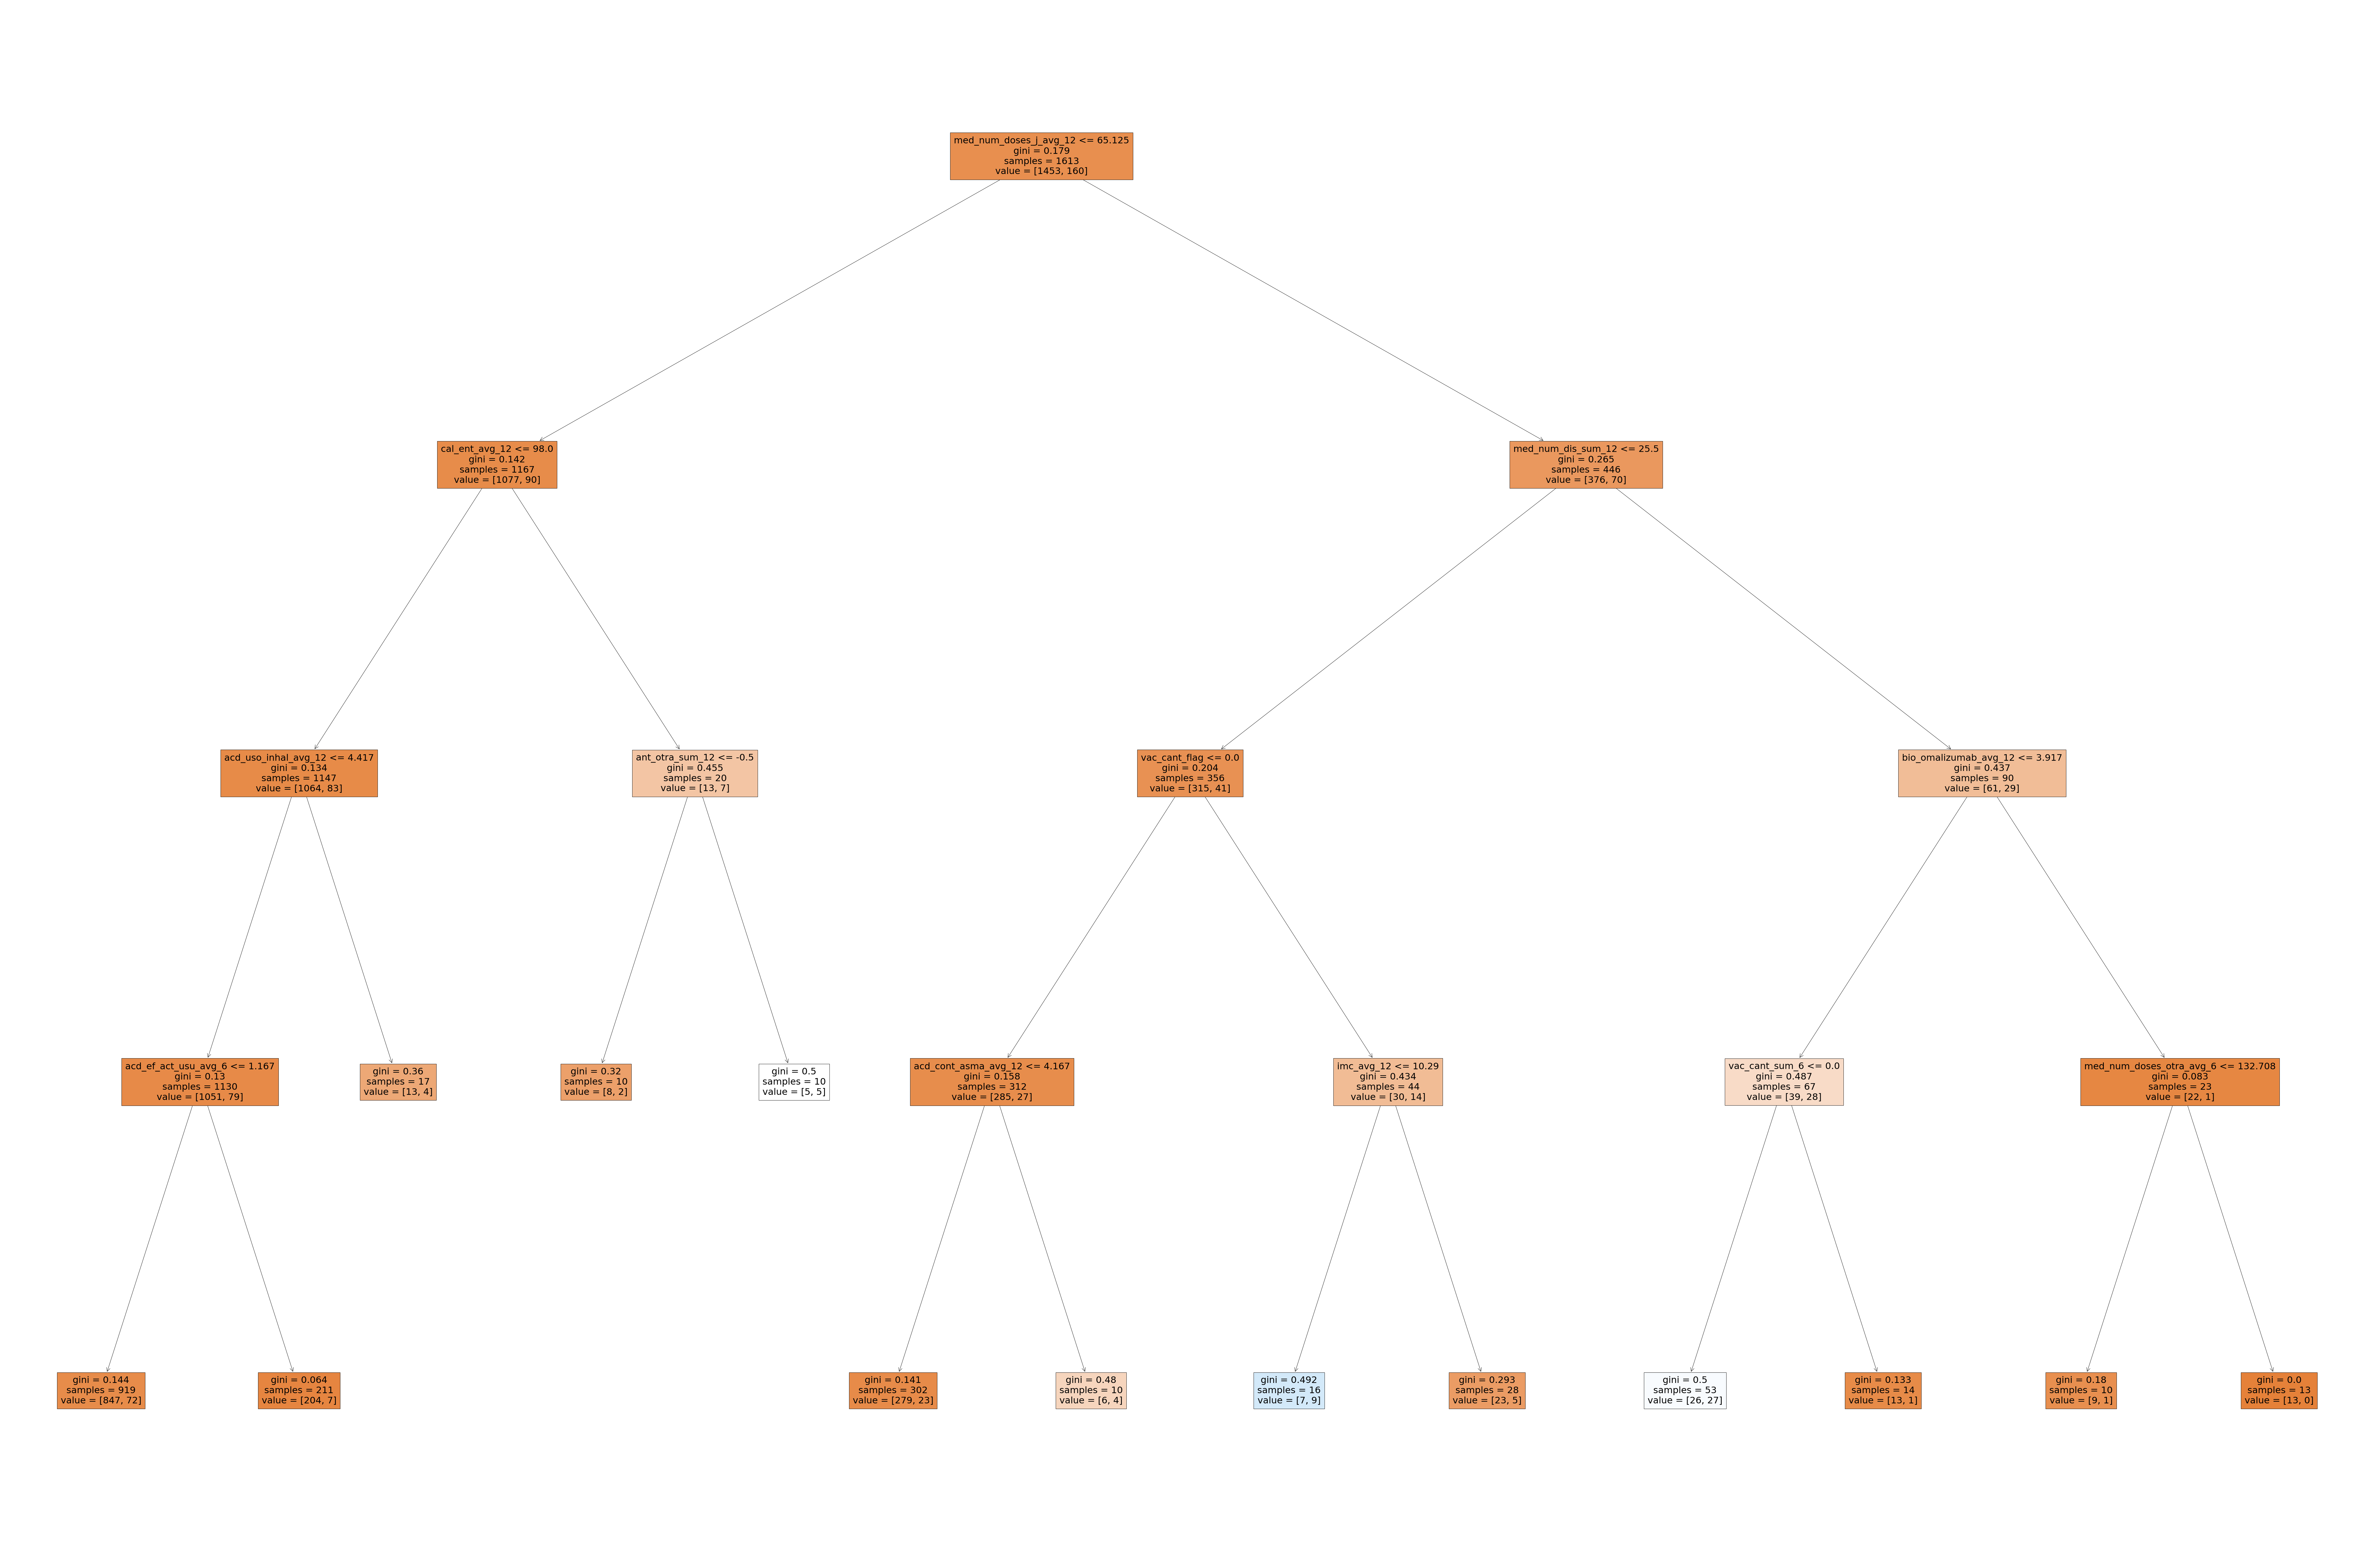

In [58]:
fig = plt.gcf()
fig.set_size_inches(150, 100)
tree.plot_tree(clf,filled=True,feature_names=X.columns, rotate=True)
fig.savefig('tree.png')

# Selección IDs para entrenar

In [59]:
base_.head()

,id,year,month,adeherencia_12,cantidad,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,...,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto,adh_sum_6,adh_sum_12
1,500547,2019,3,0,4.0,1,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,500547,2019,10,0,5.0,1,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.8,-1.0,-1.0,0.0
3,500547,2019,12,0,4.0,1,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.8,-1.0,0.0,0.0
4,500547,2020,1,0,3.0,1,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.8,-1.0,0.0,0.0
5,500547,2020,3,0,2.0,1,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.8,-1.0,0.0,0.0


In [89]:
str(base_['id'][1])[-2]

'4'

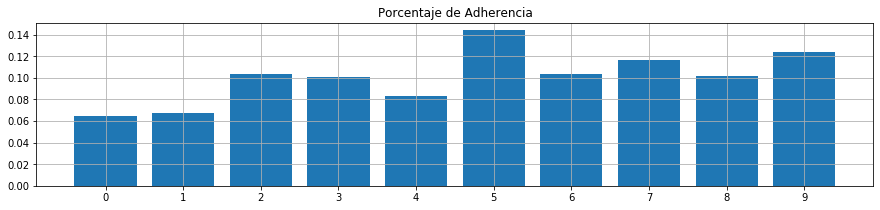

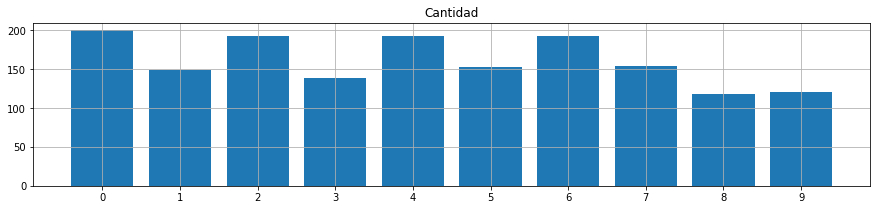

In [95]:
base_['l_id'] = base_['id'].apply(lambda x : str(x)[-3])
base_g = base_.groupby(['l_id']).agg(mean=('adeherencia_12', 'mean'), count=('adeherencia_12', 'count')).reset_index()

fig, ax = plt.subplots(figsize=(15, 3))
rects1 = ax.bar(base_g['l_id'], base_g['mean'] )
plt.title('Porcentaje de Adherencia')
plt.grid()

fig, ax = plt.subplots(figsize=(15, 3))
rects2 = ax.bar(base_g['l_id'], base_g['count'] )
plt.title('Cantidad')
plt.grid()